Загальна кількість операцій: 21904
Кількість операцій множення: 10952
Кількість операцій додавання: 10952


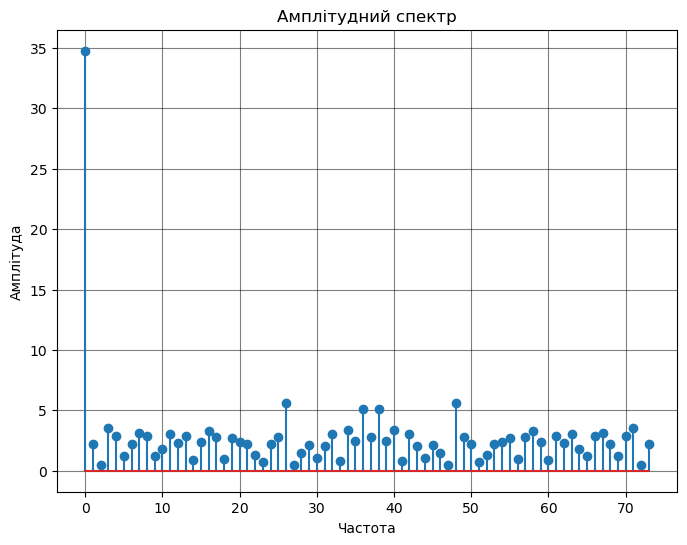

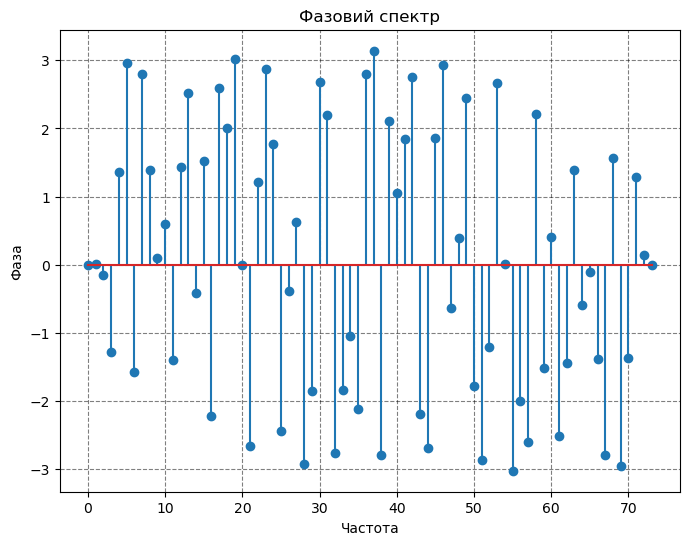

C[0] = (34.764055314722846+0j)
C[1] = (2.227660592796332+0.0178625503137734j)
C[2] = (0.5015676749283066-0.0753263011183016j)
C[3] = (0.9829395968437906-3.4014471857485455j)
C[4] = (0.5855426277791013+2.7845488028174157j)
C[5] = (-1.1800628412389238+0.22342345040134148j)
C[6] = (-0.00512807427442985-2.2461565226618303j)
C[7] = (-2.9756730404691663+1.0513321227677466j)
C[8] = (0.5318214987887949+2.812291468176979j)
C[9] = (1.2202705589503506+0.12599702788802447j)
C[10] = (1.4714081345698484+0.9860370154835537j)
C[11] = (0.5183409878841763-2.9568578103445793j)
C[12] = (0.30297364202350385+2.276593323934878j)
C[13] = (-2.314449343887027+1.649341657696532j)
C[14] = (0.7836919691858719-0.34256406227211245j)
C[15] = (0.12010121670268192+2.4009191923112407j)
C[16] = (-1.95210097285134-2.5949353658684j)
C[17] = (-2.357673141321884+1.4260763444227536j)
C[18] = (-0.4023995281948984+0.879961101780527j)
C[19] = (-2.6609707926173067+0.31014502122929155j)
C[20] = (2.4084276903278243-0.01684819341174

In [1]:
import numpy as np
import warnings
from matplotlib import MatplotlibDeprecationWarning
import matplotlib.pyplot as plt
import time

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

def fourier_coefficient(x, k):
    N = len(x)
    Ak = np.sum(x * np.cos(2*np.pi*k*np.arange(N)/N))
    Bk = np.sum(x * np.sin(2*np.pi*k*np.arange(N)/N))
    Ck = Ak - 1j*Bk
    num_ops = 4 * N  # кількість операцій
    num_mult_ops = 2 * N # кількість операцій множення
    num_add_ops = 2 * N # кількість операцій додавання
    return Ck, num_ops, num_mult_ops, num_add_ops

def discrete_fourier_transform(x):
    N = len(x)
    C = np.zeros(N, dtype=np.complex128)
    total_ops = 0  # лічильник загальної кількості операцій
    total_mult_ops = 0 # лічильник загальної кількості операцій множення
    total_add_ops = 0 # лічильник загальної кількості операцій додавання
    for k in range(N):
        C[k], num_ops, num_mult_ops, num_add_ops = fourier_coefficient(x, k)
        total_ops += num_ops
        total_mult_ops += num_mult_ops
        total_add_ops += num_add_ops
    print(f"Загальна кількість операцій: {total_ops}")
    print(f"Кількість операцій множення: {total_mult_ops}")
    print(f"Кількість операцій додавання: {total_add_ops}")
    return C

K=64
# генеруємо масив випадкових даних
x = np.random.rand(K+10)

# замір часу на початку
start_time = time.time()

# обчислюємо ДПФ
C = discrete_fourier_transform(x)

# обчислення спектру амплітуд
amplitude_spectrum = abs(C)

# обчислення спектру фаз
phase_spectrum = np.angle(C)

# побудова графіку спектру амплітуд
plt.figure(figsize=(8, 6))
plt.stem(amplitude_spectrum, use_line_collection=True)
plt.xlabel('Частота')
plt.ylabel('Амплітуда')
plt.title('Амплітудний спектр')
plt.grid(True, which='both', linestyle='-', alpha=0.5, color = "black")
plt.show()

# побудова графіку спектру фаз
plt.figure(figsize=(8, 6))
plt.stem(phase_spectrum, use_line_collection=True)
plt.xlabel('Частота')
plt.ylabel('Фаза')
plt.title('Фазовий спектр')
plt.grid(True, which='both', linestyle='--', alpha=0.5, color = "black")
plt.show()

# вивід результатів та часу виконання
for k in range(len(C)):
    print(f"C[{k}] = {C[k]}")

# замір часу в кінці та вивід часу виконання
end_time = time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")